In [1]:
source("CMAES.R")
source('DES.R')
source("Classes.R")
source("Utils.R")
source("TargetFunctions.R")
library(hash)

DEFAULT_CR <- 0.5
DEFAULT_F <- 0.8

is_empty <- function(x) return(length(x) ==0 )

DifferentialEvolution <- setRefClass(
    "DifferentialEvolution",
    contains = "Algorithm",
    fields = list(
        cr = "numeric",
        f = "numeric",
        H = "data.frame" 
    ),
    methods = list(
        init_default_parameters = function(){
            if(is_empty(f)){
                f <<- DEFAULT_F
            }
            if(is_empty(cr)){
                cr <<- DEFAULT_CR
            }
        },
        crossover = function(x,y){
            z <- c()
            for (i in 1:length(x)){
                a <- runif(1, 0, 1)
                if (a < cr) 
                z <- append(z, y[i])
                else 
                z <- append(z, x[i])
            }
            return(z)
        },

        tournanemt = function(x,y){
#             print(x)
#             print(y)
            cond <- x['fitness'] > y['fitness']
            if(cond) 
                return(y)
            else
                return(x)
        },

        run = function() {
            init_default_parameters()
            gen_random_population()

            if(point_dim == 2){
                LOG_POPS <- TRUE
                first_pops <<- list(population) 
            }else{
                LOG_POPS <- FALSE
            }

            H <<- population
            mi <- dim(population)[1]
            iterations <<- 0
            while(iterations < max_iter){

                if(LOG_POPS && iterations <20){
                    first_pops <<- list.append(first_pops, population)
                }

                next_P <- population
                for (i in 1:mi){
                    indexes <- sample(1:mi, 3, replace=F)
                    r <- as.matrix(population[indexes[1],-length(population)])
                    d_e <- as.matrix(population[indexes[2:3],-length(population)])
                    
                    M <- r + f*(d_e[2,] - d_e[1,])
                    cross <- crossover(r, M)
#                     print(sprintf("d_e: %s", d_e))
#                     print(sprintf("M: %s", M))
#                     print(sprintf("r: %s", r))
#                     print(sprintf("cross: %s", cross))
#                     print('------------')
#                     print(objective_fun$evaluate(cross))
                    O <- data.frame(t(cross), fitness=objective_fun$evaluate(cross))
                    # append(H,O)
                
                    next_P[i,] <- tournanemt(population[i,], O)
                }
                population <<- next_P
                print(class(population))
                best_point <- sel_best()
                # print(sel_best())
                # print(objective_fun$evaluate(sel_best()))
                iterations <<- iterations+1
            }
            print('here')
            return(new('Result', best_point=best_point, end_reason='max_iter',mean_iteration_time=0))
        }
    )
)

hash-2.2.6.1 provided by Decision Patterns



Attaching package: 'hash'


The following object is masked from 'package:pracma':

    clear




In [6]:
objective_function <- sum_of_squares
problem_dimension <- 2
# constraints <- list(c(-0.5,0.5), c(-0.2,0.5))
constraints <- list(c(-Inf,Inf), c(-Inf,Inf))
repair_method <- 'projection'
algorithm <- 'de'
max_iter <- 400

[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.frame"
[1] "data.fram

An object of class "Result"
Slot "best_point":
             X1            X2      fitness
40 2.731441e-42 -4.359997e-43 7.650868e-84

Slot "end_reason":
[1] "max_iter"

Slot "mean_iteration_time":
[1] 0

Slot "iterations":
numeric(0)

Slot "times_list":
numeric(0)


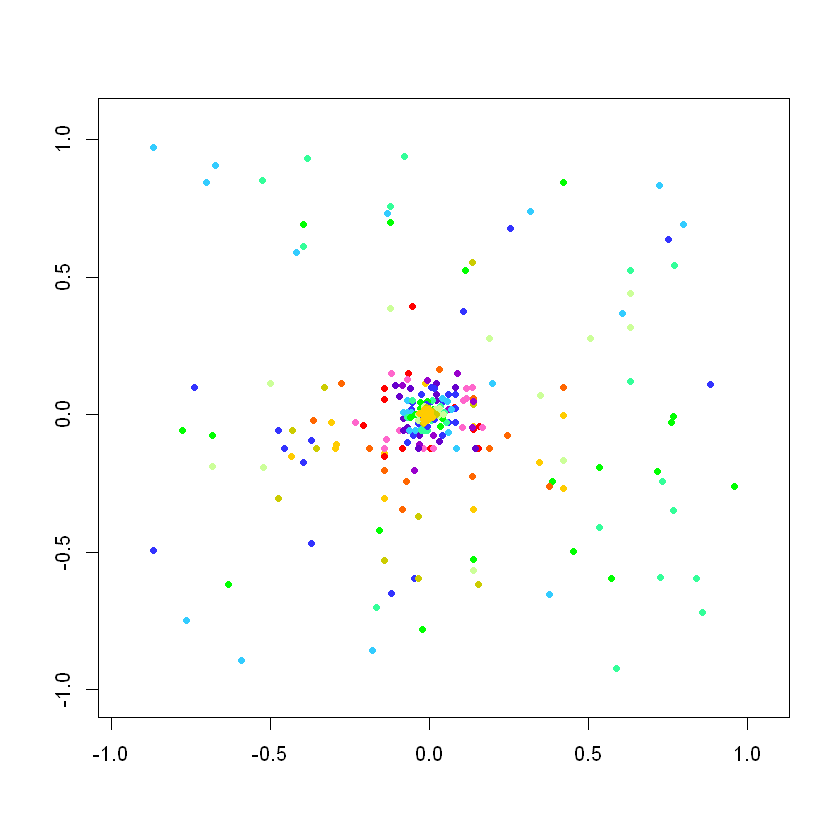

In [7]:
algorithms <- hash()
algorithms['cmaes'] <- CMAES$new()
algorithms['de'] <- DifferentialEvolution$new()
algorithms['des'] <- DES$new()

alg <- algorithms[[algorithm]]
if(is_empty(constraints)){
    of <- ObjectiveFunction$new(fun=objective_function, dim=problem_dimension)
}else{
    of <- ObjectiveFunction$new(fun=objective_function, dim=problem_dimension, bounds=constraints, repair_method=repair_method)
}

alg$objective_fun <- of
alg$point_dim <- of$dim
alg$max_iter <- max_iter
# alg$defaultMean <- c(1,1)
# alg$m <- c(1,1)
res <- alg$run()
# print(alg$first_pops)
alg$draw_first_pops()
return(res)

In [12]:
alg$sel_best()

ERROR: Error in alg$sel_best(): 'list' object cannot be coerced to type 'double'


In [9]:
print(alg$population)

              X1            X2      fitness
1  -4.726868e-41 -3.933908e-41 3.781891e-81
2  -2.575264e-41  9.499257e-43 6.641006e-82
3   6.393004e-42 -3.944449e-43 4.102609e-83
4  -5.610396e-41 -4.359997e-43 3.147844e-81
5  -2.047214e-41  1.077980e-41 5.353125e-82
6   3.926848e-41  5.444082e-41 4.505817e-81
7  -9.304802e-42  1.849274e-41 4.285609e-82
8  -2.945158e-41  3.434646e-41 2.047074e-81
9  -2.945158e-41 -1.155971e-41 1.001022e-81
10  2.754778e-41 -2.300380e-41 1.288055e-81
11 -4.855001e-41 -2.401538e-41 2.933841e-81
12  3.522018e-41  3.544917e-41 2.497105e-81
13  4.889138e-41  1.836468e-41 2.727628e-81
14  5.871278e-41 -3.510426e-42 3.459514e-81
15 -5.414656e-41 -7.947653e-41 9.248369e-81
16 -2.047214e-41  1.884860e-42 4.226611e-82
17 -9.304802e-42  1.849274e-41 4.285609e-82
18 -1.989604e-41 -4.675626e-41 2.582000e-81
19 -4.249711e-41  1.849274e-41 2.147986e-81
20 -9.328880e-43  3.261171e-41 1.064394e-81
21  6.732300e-42  1.933726e-41 4.192535e-82
22  3.225945e-41 -3.541189e-41 2

In [15]:
population <- alg$population
min_fitness <- min(population[,'fitness'])
min_point <- population[population['fitness'] == min_fitness,]
as.numeric(min_point[-length(min_point)])

ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'


In [22]:
min_point[1,]

,X1,X2,fitness
,<dbl>,<dbl>,<dbl>
4,-0.004599566,-0.04740462,0.002268354
